Необходимо провести разведывательный анализ данных и определить параметрры для будущей модели, составить отчёт по его результатам.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [ ]:
students = pd.read_csv('stud_math.csv')
students.drop(['studytime, granular'], inplace = True, axis=1) #delete column
 
# delete empty data
for column in students.columns:
  students[column] = students[column].apply(lambda x: None if pd.isnull(x) else x)
students.score = students.score.apply(lambda x: 0 if str(x)=='nan' else x)
 
column_n = [column for column in students.columns if type(students[column][3])==str] # nominative columns
 
# get box plots
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students,
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
 
# calculate student test for columns
def get_stat_dif(column):
    cols = students[column].value_counts().index
    combinations_all = list(combinations(cols, 2)) 
    for comb in combinations_all:
      if ttest_ind(students[students[column] == comb[0]].score, 
                     students[students[column] == comb[1]].score).pvalue \
            <= 0.05/len(combinations_all): # Bonferoni check
         print('Found statistically significant differences for the column', column)
         break 
 
display(students) 
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

###1. Аббревиатура школы, в которой учится ученик

In [ ]:
students.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

###2. Пол ученика

In [ ]:
students.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

'F' - женский, 'M' - мужской. 
 
Девочек учится немного больше чем мальчиков.

###3. Возраст ученика

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

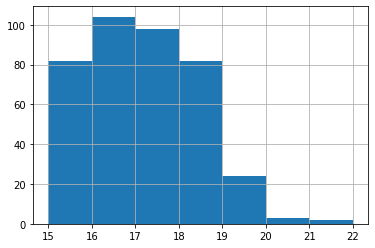

In [ ]:
students.age.hist(bins=7)
students.age.value_counts()

Больше всего школьников от 16 до 18 лет.

###4. Тип адреса ученика

In [ ]:
students.address.value_counts()

U    295
R     83
Name: address, dtype: int64

'U' - городской, 'R' - за городом. 
 
Большинство учеников живут в городе.

###5. Размер семьи

In [ ]:
students.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

'LE3' <= 3, 'GT3' >3. 
 
Размер семьи в большенстве случаев меньше либо равен трём людям.

###6. Статус совместного жилья родителей

In [ ]:
students.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

'T' - живут вместе 'A' - раздельно. 
 
Практически все родители живут вместе.

###7. Образование матери

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

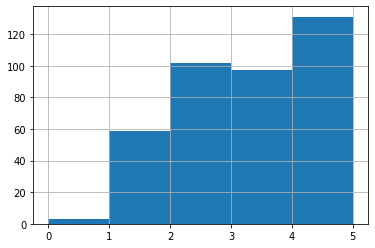

In [ ]:
students.Medu.hist(bins=5, range=(0, 5))
students.Medu.value_counts()

0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее. 
 
Образование матерей чаще высшее, есть возрастающая тенденция.

###8. Образование отца

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

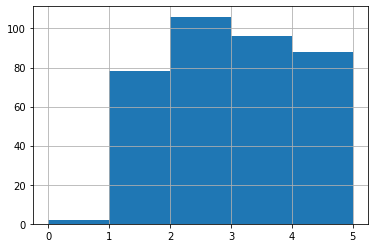

In [ ]:
students.Fedu.hist(bins=5, range=(0, 5))
students.Fedu = students.Fedu.apply(lambda x: None if x == 40 else x) # delete outliers 
students.Fedu.value_counts()

0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее. 
 
В основном отцы имеют образование ниже высшего

###9. Работа матери

In [ ]:
 students.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое. 
 
Матери в основном работают на государственных службах.

###10. Работа отца

In [ ]:
students.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое. 
 
Также как и матери, большинство отцов работает в госслужбах, но больше чем матери в других сферах.

###11. Причина выбора школы

In [ ]:
 students.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое. 
 
Примерно одинаково выбор школы зависит от репутации, близости к дому и образовательной программы, но чаще от последнего.

###12. Опекун

In [ ]:
 students.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

'mother' - мать, 'father' - отец, 'other' - другое. 
 
Почти в три раза чаще матери становятся опекунами, чем отцы.

###13. Время в пути до школы

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

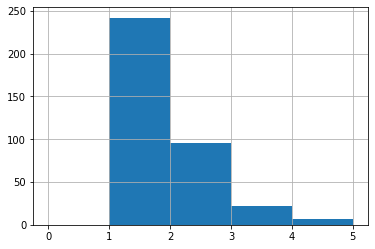

In [ ]:
students.traveltime.hist(bins=5, range=(0, 5))
students.traveltime.value_counts()

1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.
 
Большинство школьников живут в пятнадцати минутах пути от школы.

###14. Время на учёбу помимо школы в неделю

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

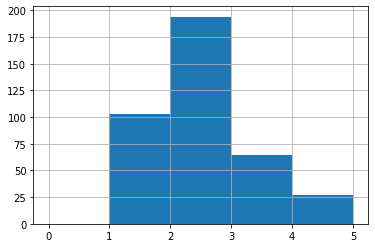

In [ ]:
students.studytime.hist(bins=5, range=(0, 5))
students.studytime.value_counts()

1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов. 
 
В основном 2-5 часов в неделю школьники тратят на учёбу помимо школы

###15. Количество внеучебных неудач

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

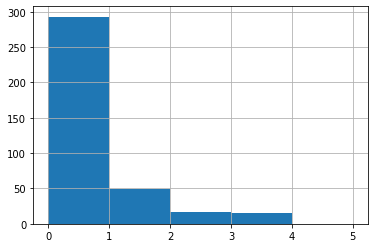

In [ ]:
students.failures.hist(bins=5, range=(0, 5))
students.failures.value_counts()

n, если 1<=n<=3, иначе 0. 
 
Подавляющее большинство успешны.

###16. Дополнительная образовательная поддержка

In [ ]:
students.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

Только 13% дополнительно обучаются

###17. Семейная образовательная поддержка

In [ ]:
students.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

Семейную образовательную поддержку получает большинство

###18. Дополнительные платные занятия по математике

In [ ]:
students.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

Больше половины занимаются математикой платно

###19. Дополнительные внеучебные занятия

In [ ]:
students.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

Половина учеников занимается дополнительно

###20. Посещал детский сад

In [ ]:
students.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

80% посещали детсад

###21. Хочет получить высшее образование

In [ ]:
students.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

Подавляющее большинство хотят получить высшее образование.

###22. Наличие интернета дома

In [ ]:
students.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

85% пользуются интернетом дома

###23. В романтических отношениях

In [ ]:
students.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

Треть в романтических отношениях

###24. Семейные отношения

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

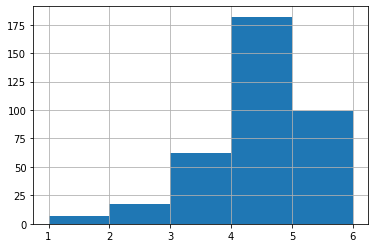

In [ ]:
students.famrel.hist(bins=5, range=(1, 6))
students.famrel = students.famrel.apply(lambda x: None if x == -1 else x) # delete outliers 
students.famrel.value_counts()

От 1 - очень плохо до 5 - очень хорошо.
 
В основном, семейные отношения хорошие.

###25. Свободное время после школы

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

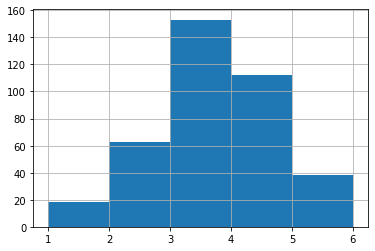

In [ ]:
students.freetime.hist(bins=5, range=(1, 6))
students.freetime.value_counts()

От 1 - очень мало до 5 - очень мого.
 
Нормальное распределение с небольшим смещением влево. У большинства среднее количество свободного времени.

###26. Проведение времени с друзьями

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

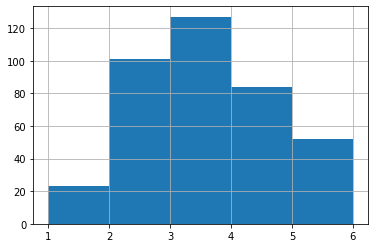

In [ ]:
students.goout.hist(bins=5, range=(1, 6))
students.goout.value_counts()

От 1 - очень мало до 5 - очень мого.
 
Нормальное распределение. Большинство проводят с друзьями среднее количество времени.

###27. Текущее состояние здоровья

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

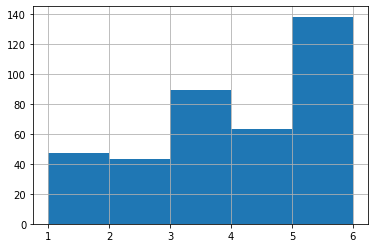

In [ ]:
students.health.hist(bins=5, range=(1,6))
students.health.value_counts()

От 1 - очень плохо до 5 - очень хорошо.
 
У большинства очень хорошее здоровье. Есть возврастающая тенденция.

###28. Количество пропущенных занятий

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

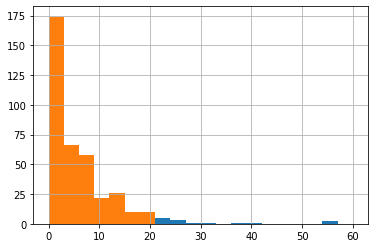

In [ ]:
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
IQR = perc75 - perc25 
students.absences.hist(bins=20, range=(0, 60))
students = students[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students.absences.hist(bins=20, range=(0, 60))
students.absences.value_counts()

Большинство учеников не пропускают занятий. Есть отрицательная тенденция.

###29. Баллы по госэкзамену по математике

25s quantile: 40.0, 75s quantile: 68.75, IQR: 28.75,  Outsiders borders: [-3.125, 111.875].


50.0     53
55.0     42
0.0      41
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

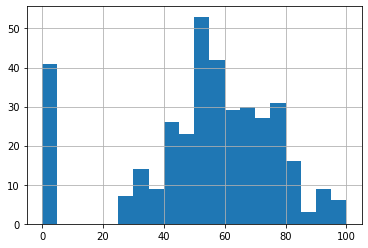

In [ ]:
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
IQR = perc75 - perc25
print('25s quantile: {},'.format(perc25), 
      '75s quantile: {},'.format(perc75), 
      "IQR: {}, ".format(IQR),
      "Outsiders borders: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.score.hist(bins=20, range=(0, 100))
students.score.value_counts()

Нормальное распределение. 11% учеников не сдали экзамен.

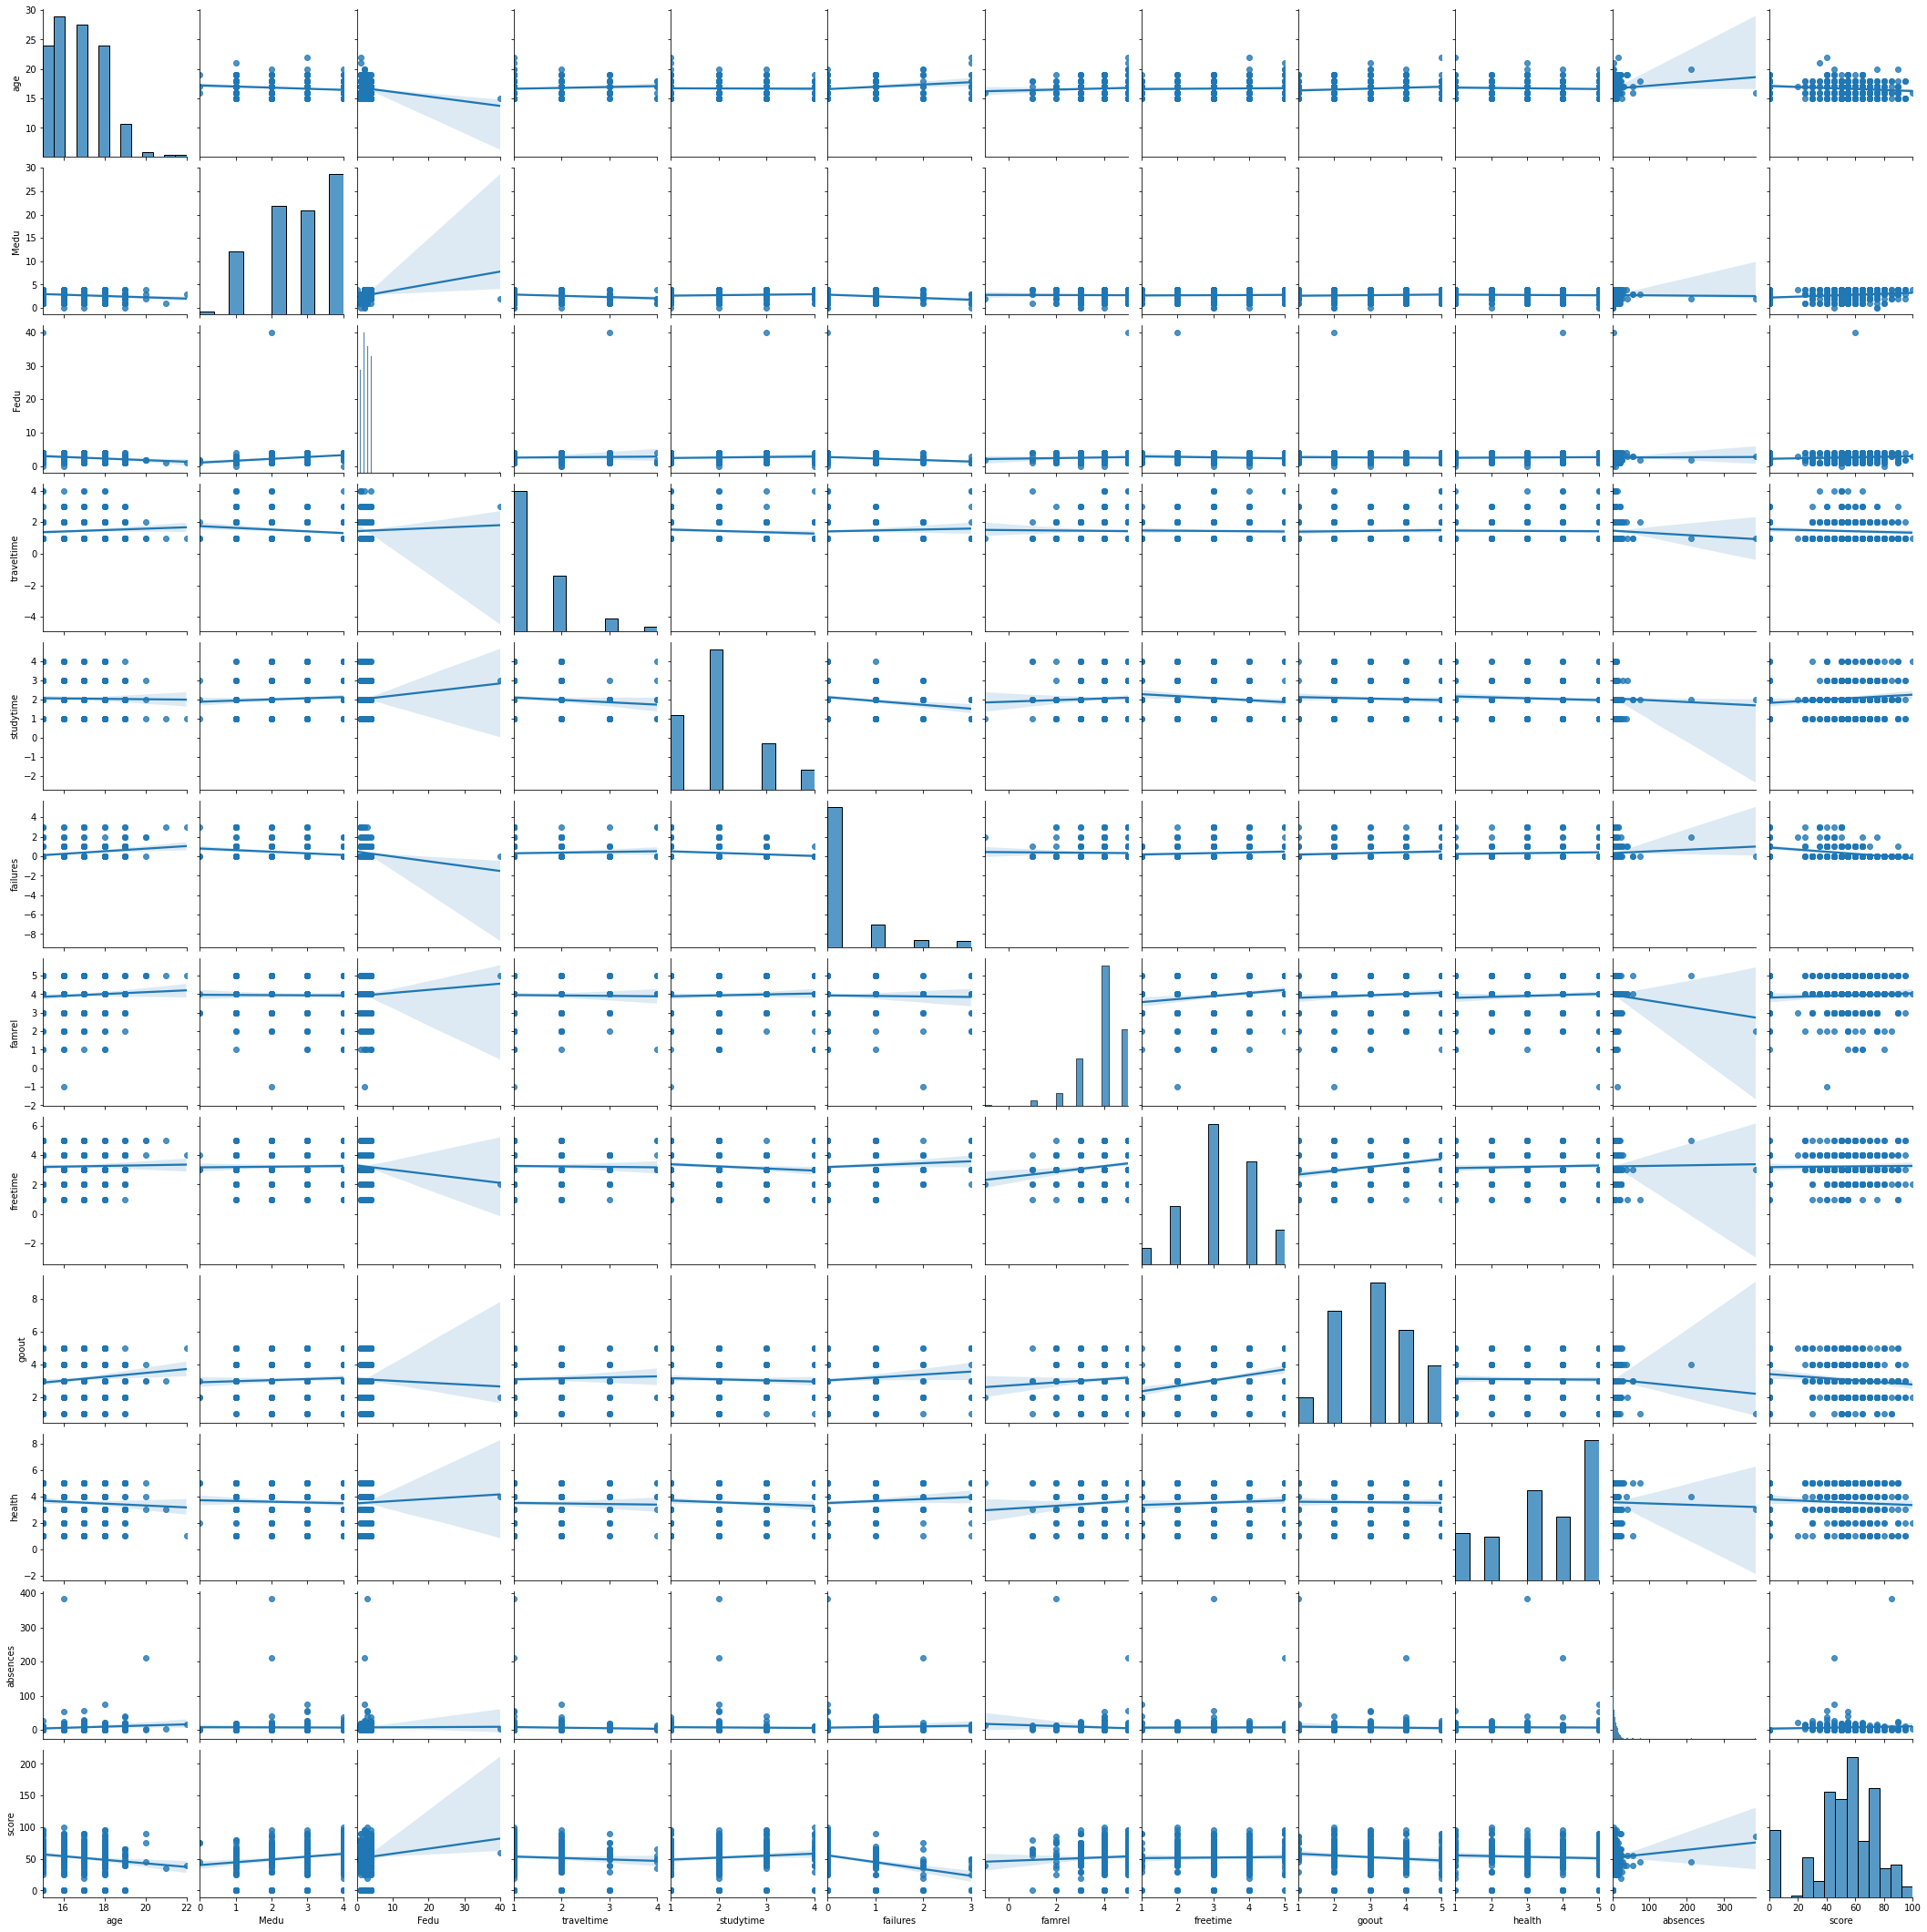

In [ ]:
sns.pairplot(students, kind = 'reg')

In [ ]:
 students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


Больше всего оценка по математике зависит от внеучебных неудач, чем их меньше, тем выше оценка. Также оценка прямо зависит от образования матери. Меньше зависит от возраста и времени проведённого с друзьями, чем больше возраст и время, тем меньше оценка. Есть небольшая положительная зависимость от количества времени на учёбу вне школы, чем его больше, тем выше бал. 
 
Меньше всего оценка зависит от количества свободного времени после школы. Мало зависит от семейных отношений, пропущенных занятий, здоровья, времени на дорогу, образования отца.

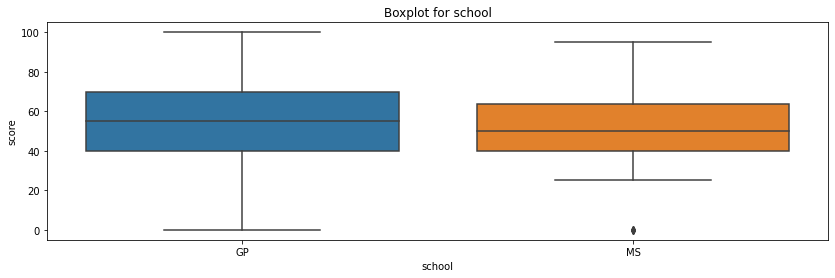

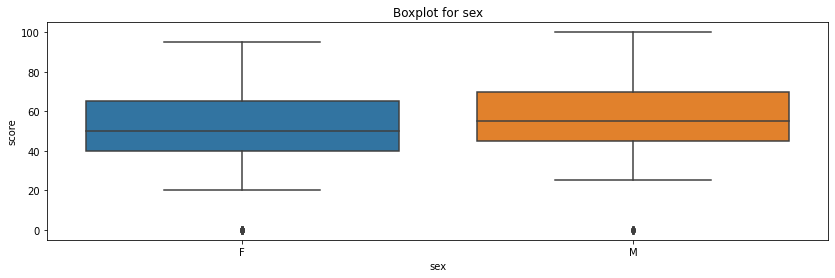

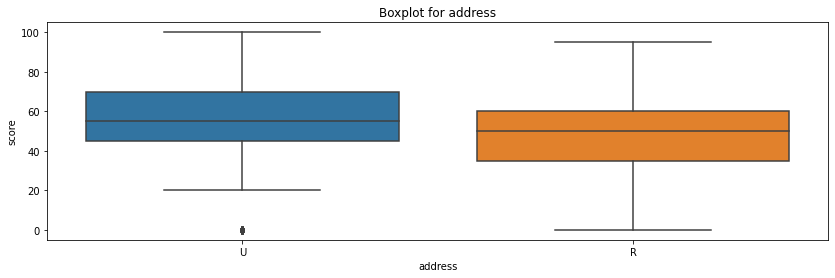

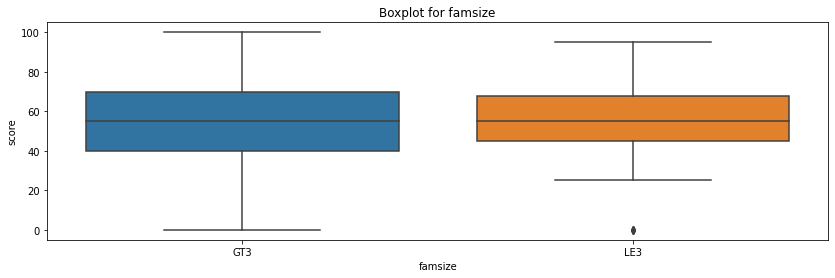

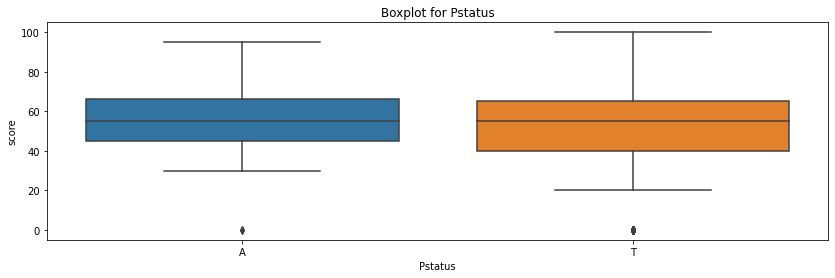

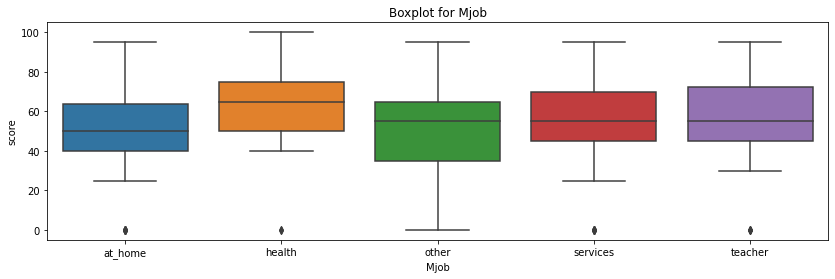

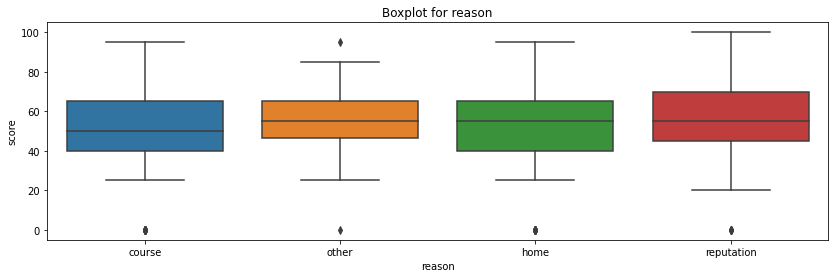

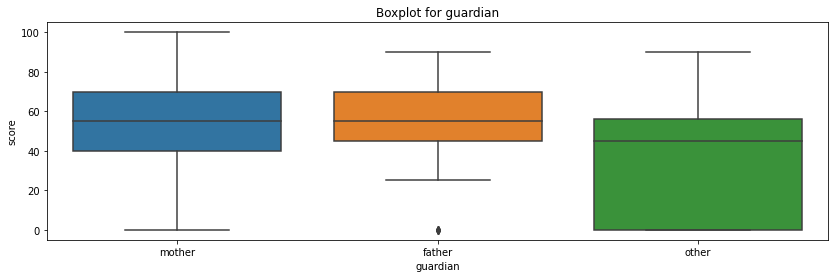

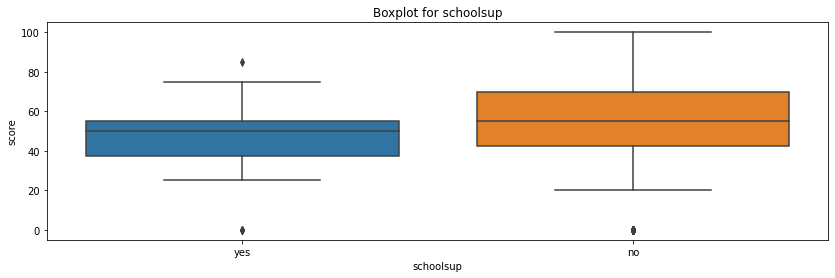

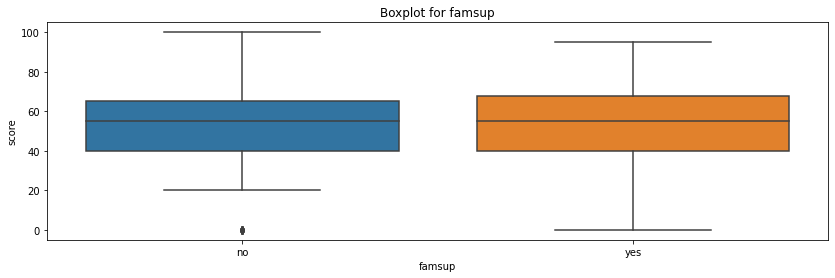

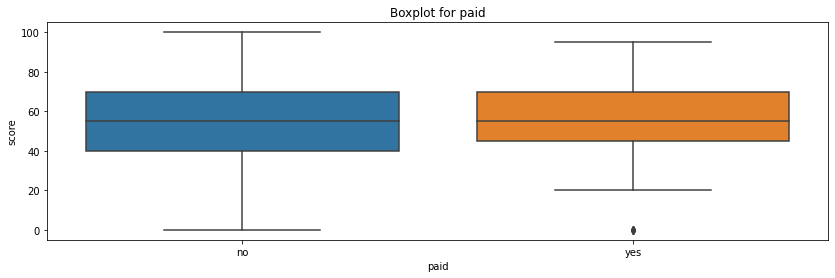

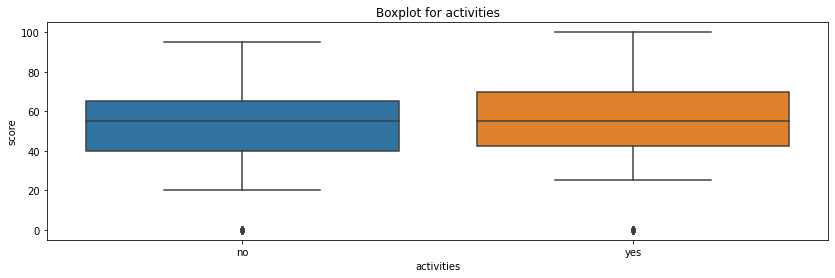

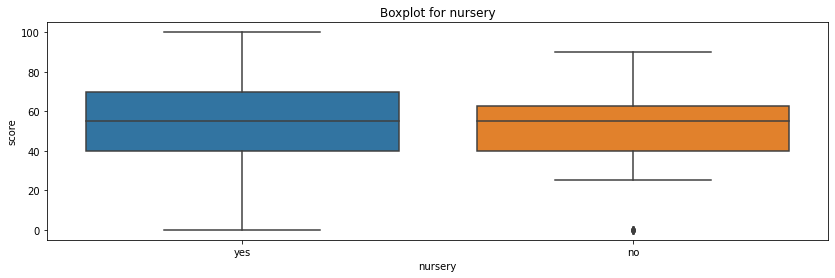

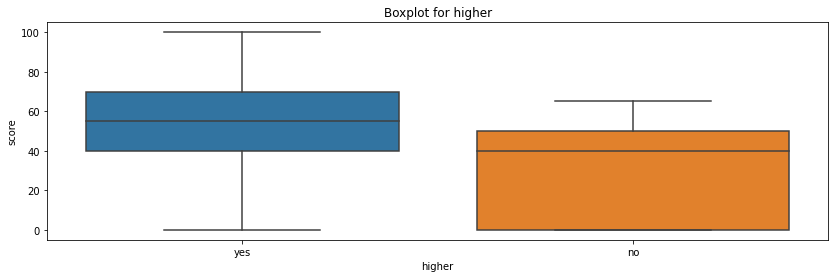

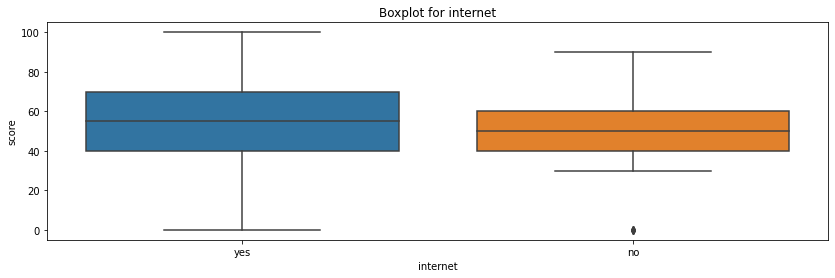

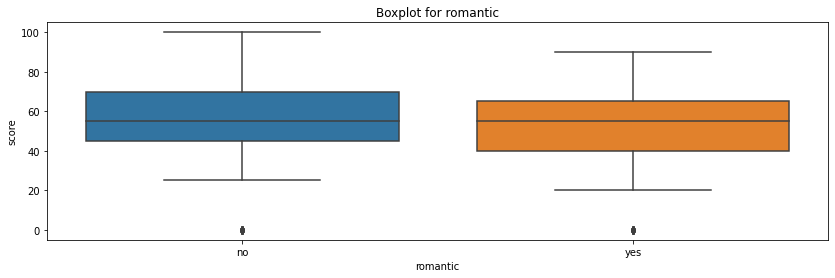

In [ ]:
for col in column_n:
  get_boxplot(col)

In [ ]:
 for col in column_n:
  get_stat_dif(col)

Found statistically significant differences for the column sex
Found statistically significant differences for the column address
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column guardian
Found statistically significant differences for the column schoolsup
Found statistically significant differences for the column higher
Found statistically significant differences for the column romantic


Статистически значимы такие параметры как пол, место жительства, работа матери, кто является опекуном, дополнительная образовательная поддержка, желание получить высшее образование и есть ли романтические отношения.
 
А дополнительные платные и внеучебные зянятия по математике как и другие параметры на оценку влияют слабо.
 
Таким образом для модели будут использоваться колонки с количественными переменными: failures, Medu, age, goout, studytime, и с номинативными: sex, address, Mjob, guardian, schools up, higher, romantic.